In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-08    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-11    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  245.899994  91.573029  121.980003  229.573318  144.020004   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-08    1.588121   2.977763   13.730146    2.764918    1.144183   
1985-03-11    1.606167   3.060992   13.769285    2.764918    1.159043   
...                ...        ...         ...         ...         ...   
2020-12-22  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   Volume                                          bop             \
Symbol          BDX      GL      IBM      NSC      PEP       BDX         GL   
1985-03-05   576000  378000  4040000  1125900  5153400 -0.624992  42.000023   
1985-03-06   923200  450225  4120000  1773900  3722400 -0.857135  55.666877   
1985-03-07  1408000   71550  7028000   770400  4624200 -0.249985  54.666638   
1985-03-08   987200   69525  6892000  3031200  2764800 -0.666667  81.250315   
1985-03-11   692800  648675  4204000   936900  1609200 -0.750000  32.200041   
...             ...     ...      ...      ...      ...       ...        ...   
2020-12-22   941100  447600  4336100   806200  2653700 -0.464618  -0.358210   
2020-12-23   919500  554300  2693900  1209200  2645100 -0.927869   0.519739   
2020-12-24   440000   76100  1761100   383100   883300  0.710346  -0.255953   
2020-12-28   644500  345500  3615200   785100  2493500 -0.251941  -0.086706   
2020-12-29   817000  514800  3487000   929900  3186700 -0.305475  -0.923078   

Attributes                                    ema200                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.300000 -0.142862  0.700006    1.720674   3.251535   14.185128   
1985-03-06 -0.818182  0.363643 -0.749982    1.719894   3.249915   14.182029   
1985-03-07 -0.666667  1.000000  0.142847    1.719077   3.247759   14.176104   
1985-03-08 -0.466667 -0.875001 -0.400007    1.718088   3.245349   14.169718   
1985-03-11  0.812500 -0.250000 -0.333371    1.716795   3.242686   14.165344   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.165748  0.247494 -0.381579  242.654200  85.275914  119.399113   
2020-12-23  0.013608  0.324324 -0.052289  242.670079  85.349993  119.427641   
2020-12-24 -0.348312  0.353474  0.237109  242.723013  85.423037  119.463642   
2020-12-28 -0.130841  0.149392  0.548543  242.777013  85.499524  119.500561   
2020-12-29 -0.691961 -0.496620 -0.134712  242.832466  85.564029  119.527098   

Attributes                              macd

## 1) Modelo donde escalamos solo las variables independientes

In [3]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [4]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [5]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

## Trabajo con la accion NSC usando standarizacion

In [6]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.839015,232.182770,-0.603063,0.420046,3.636466,-0.397124,0.279083,0.790954,2.008182
2020-12-23,3.892342,233.447678,-0.309457,0.561569,3.642539,-0.359127,2.165260,0.556225,1.892915
2020-12-24,3.918191,235.758347,-0.911313,0.615266,3.648830,-0.249800,1.038579,0.391753,1.778689
2020-12-28,3.965412,233.049286,-0.618435,0.239337,3.655565,-0.022162,1.914891,0.308711,1.587939


In [ ]:
# Realizamos el holdout
#HOLDOUT = 5
#for i in range(HOLDOUT):
parameter_space ={"hidden_layer_sizes": [(100, 100,100),(50)],
    "activation": ['logistic'],
    "solver": ['sgd', 'adam']
}
    
model = MLPRegressor(max_iter=50000)
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

In [9]:
Params = {
    "hidden_layer_sizes": (100,100,100),
    "activation": 'logistic',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params['hidden_layer_sizes'])

## CrossValidation

In [ ]:
model=MLPRegressor(max_iter=20000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])
codeM.crossValidation(model, Params, dataNSC_scaler)

## Prediccion de todas las acciones, escalandolas

'NSC'

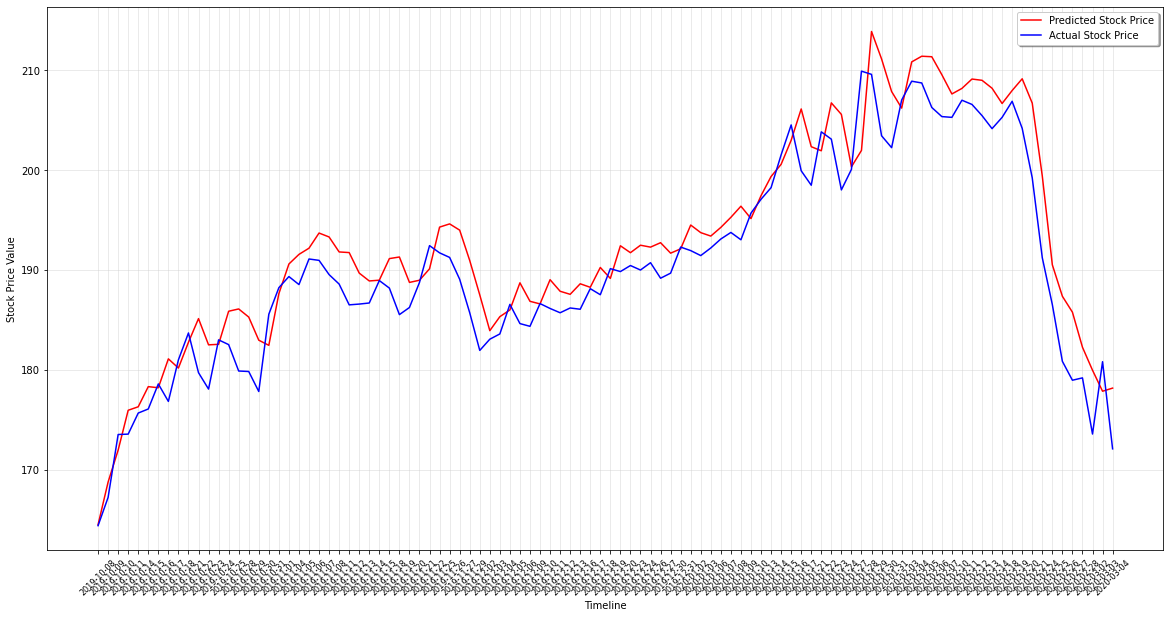

Train mae: 0.6944712684558005
Train rmse: 1.2720159318009638
mae: 0.7747955726941519
rmse: 1.5666758141407051
mape: 0.02266094275360761


'GL'

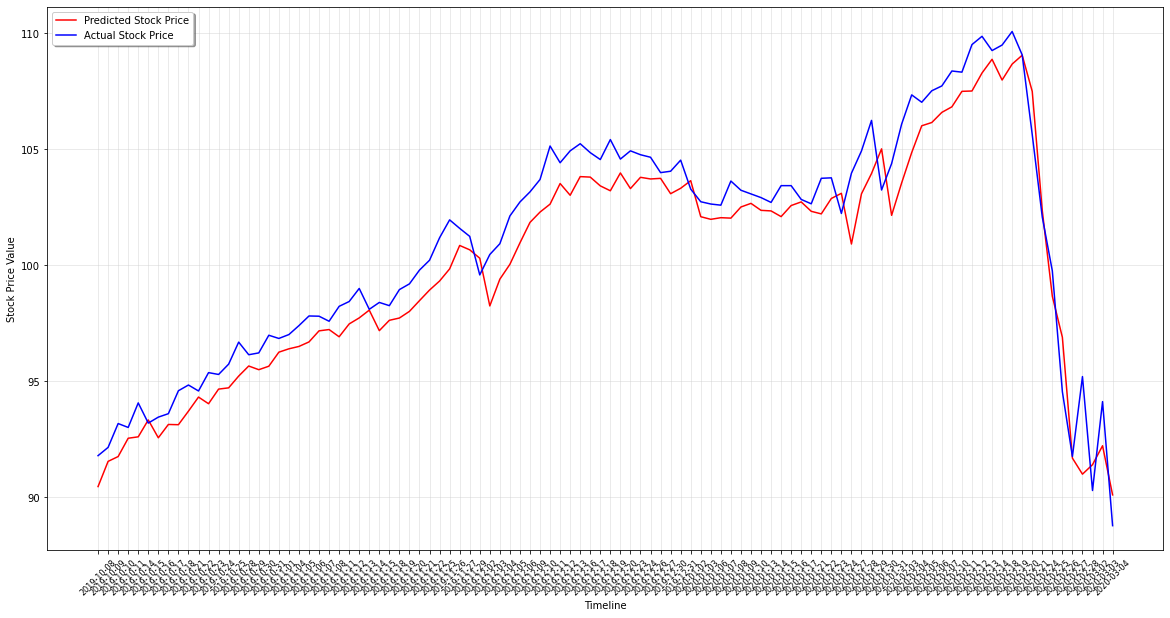

Train mae: 0.3263918247125874
Train rmse: 0.5229743639887219
mae: 0.3843725404813595
rmse: 0.7453354782859989
mape: 0.02541221772421732


'PEP'

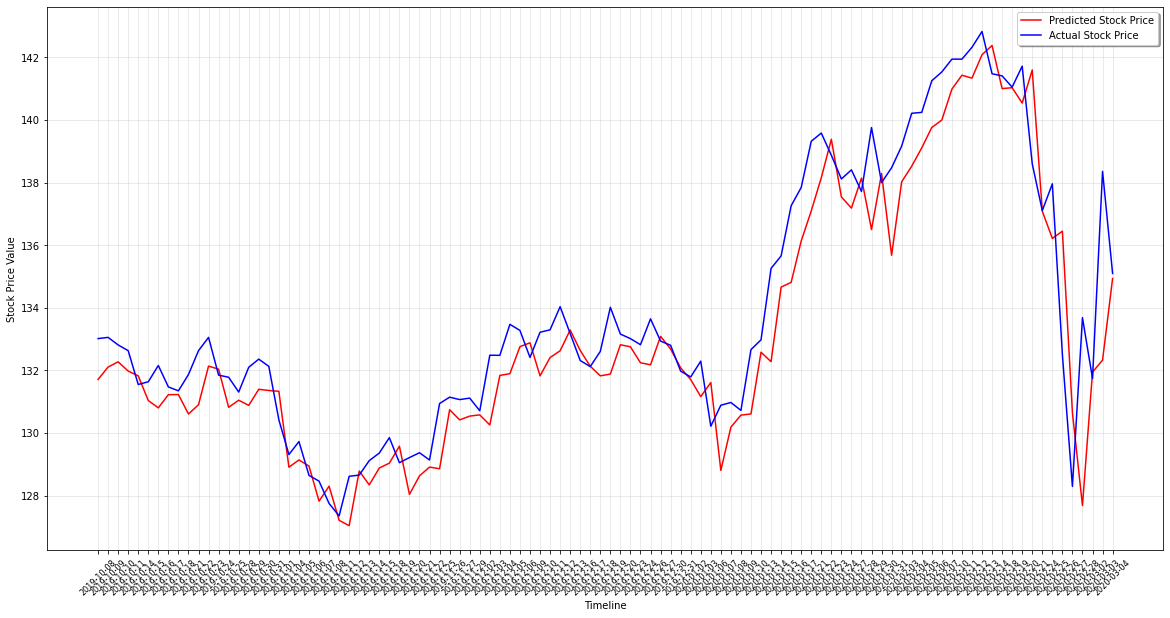

Train mae: 0.4166875282049202
Train rmse: 0.6297990204895301
mae: 0.4866722386190406
rmse: 0.8330803323042923
mape: 0.02026748325676719


'BDX'

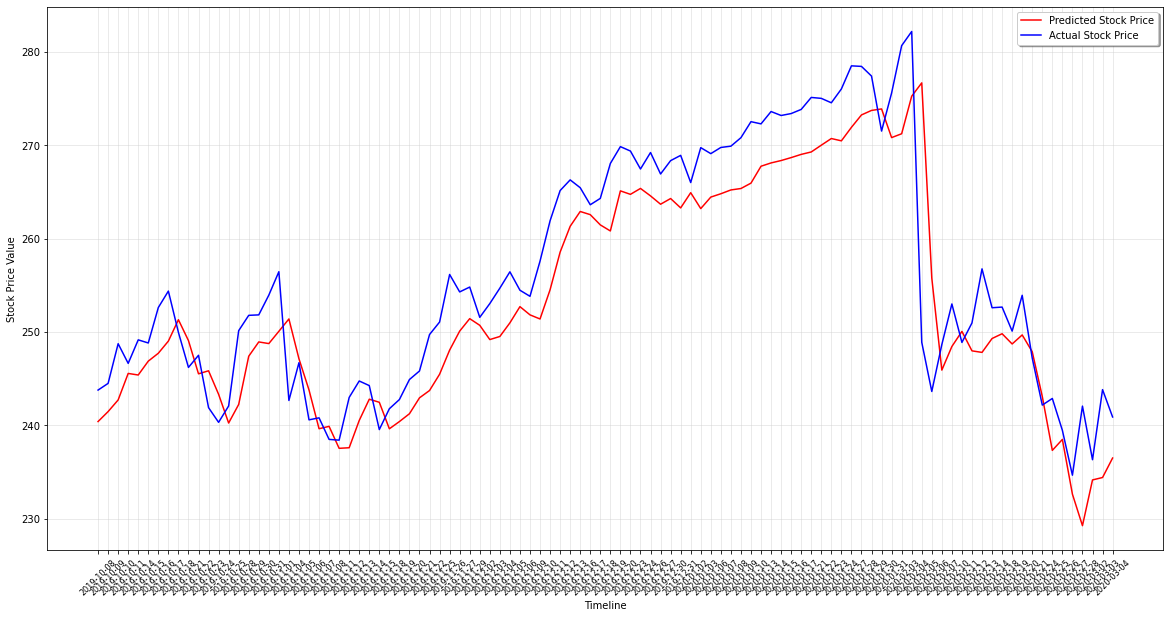

Train mae: 0.9021645126450769
Train rmse: 1.5821313195962279
mae: 1.0001306705627127
rmse: 1.8295969303123951
mape: 0.03217447409804022


'IBM'

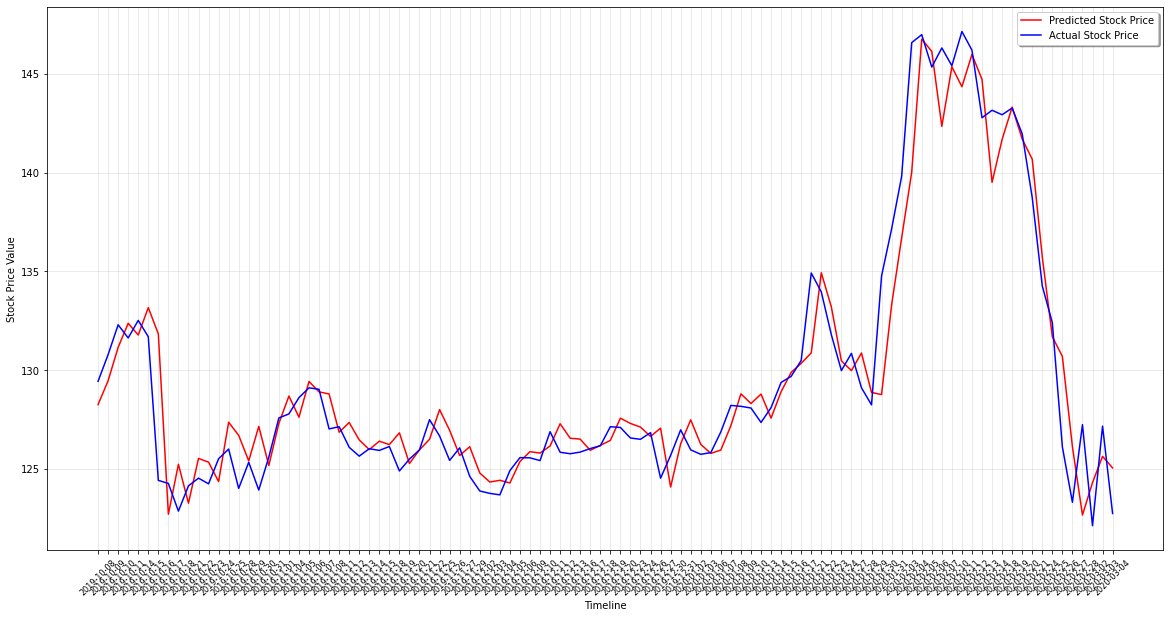

Train mae: 0.7441506619057298
Train rmse: 1.148197750207265
mae: 0.8622939293660895
rmse: 1.4028254196198868
mape: 0.016696502186689405


In [10]:
codeM.allStock(data_scaler, model, 8)

## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [16]:
# Realizamos el holdout
#HOLDOUT = 5
sc_predict = StandardScaler()
stock=dataNSC_scaler
y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
#for i in range(HOLDOUT):
parameter_space ={"hidden_layer_sizes": [(100, 100), (50, 50,50),(100,100,100)],
   "activation": ['identity','logistic'],
   "solver": ['sgd', 'adam']
}
model = MLPRegressor(max_iter=50000)
i=0.3
codeM.gridSearch(model,stock, parameter_space,0.3,8,i, isScaled=True, sc_predict=sc_predict, y=y_data)

{'activation': 'identity', 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.036751580957855315


In [17]:
Params2 = {
    "hidden_layer_sizes": (50,50,50),
    "activation": 'identity',
    "solver": 'adam'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params2['hidden_layer_sizes'], activation=Params2['activation'],solver=Params2['solver'])


## crossvalidation

In [29]:
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params2['hidden_layer_sizes'], activation=Params2['activation'],solver=Params2['solver'])
codeM.crossValidation(model, Params2, dataNSC_scaler)

[0.0165707  0.02698984 0.01789606 0.01807786 0.03464726 0.02167874
 0.02387819 0.02174043 0.03187417 0.01918697]
mean: 0.023254021162141685	 std:0.005830431635440577


## Todas las stocks

'NSC'

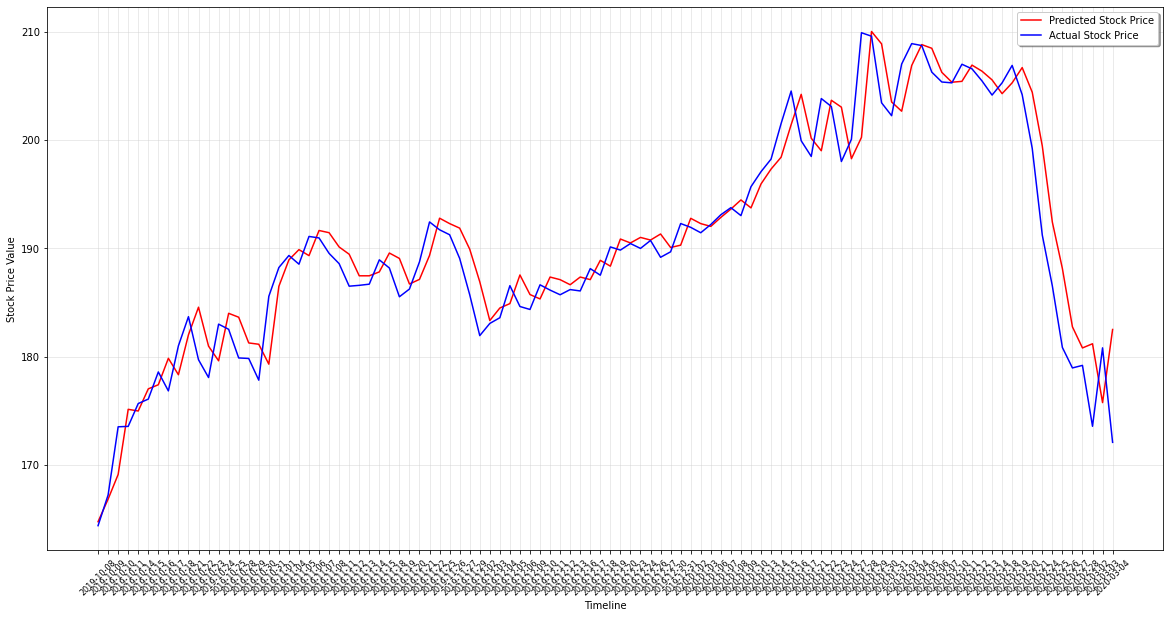

mae: 0.6573329424510556
rmse: 1.3840887401151964
mape: 0.021898469210768087


'GL'

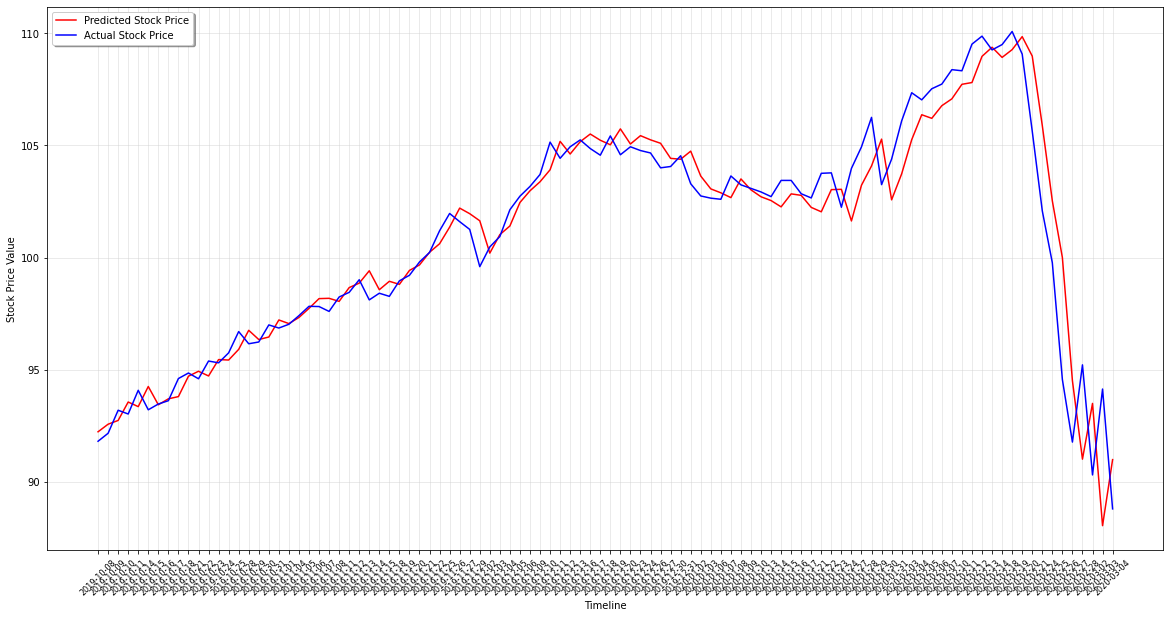

mae: 0.6459984044850737
rmse: 1.0103934531722716
mape: 0.07911846757681988


'PEP'

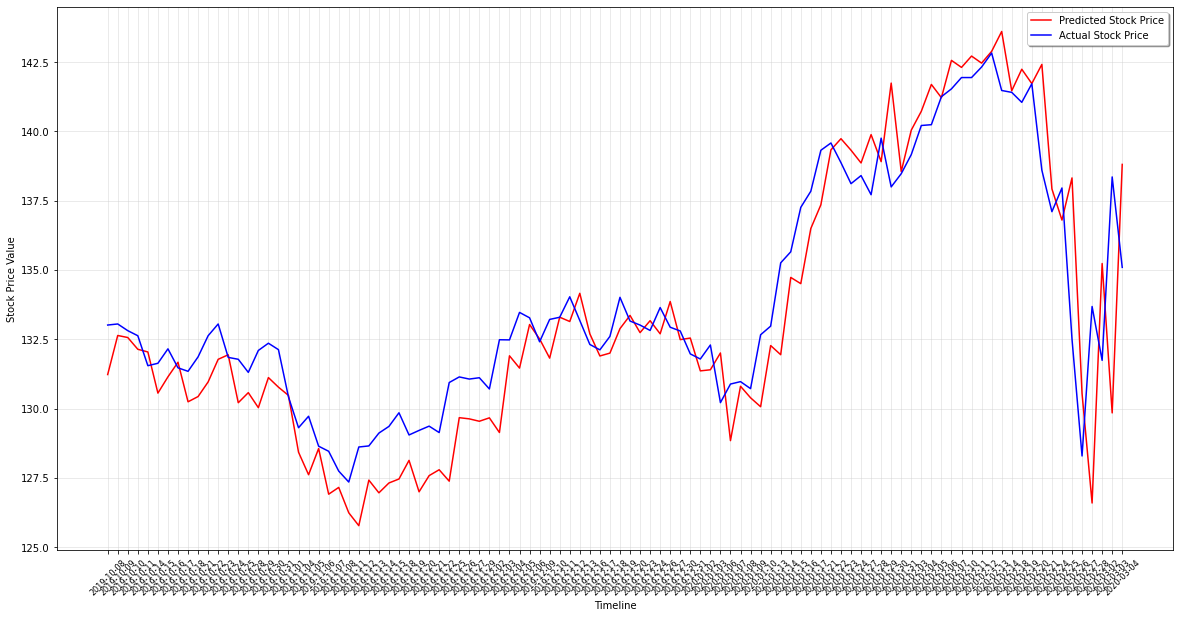

mae: 0.7185720783719217
rmse: 1.1343688718761549
mape: 0.04567819895252411


'BDX'

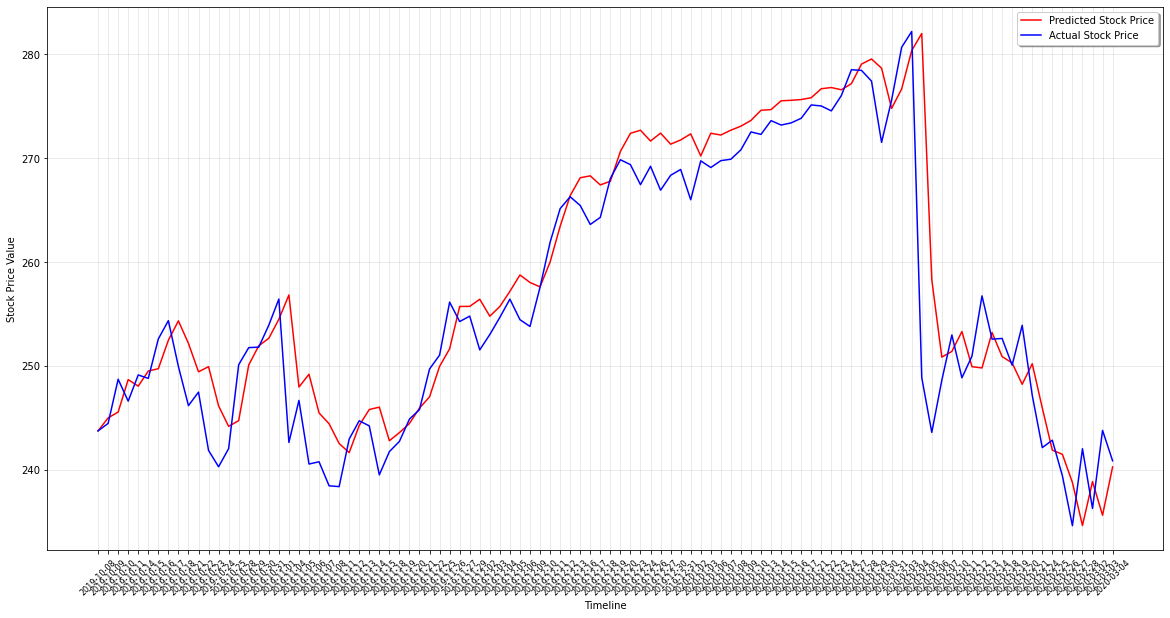

mae: 1.0268875201087748
rmse: 1.889938740986828
mape: 0.040589557904076264


'IBM'

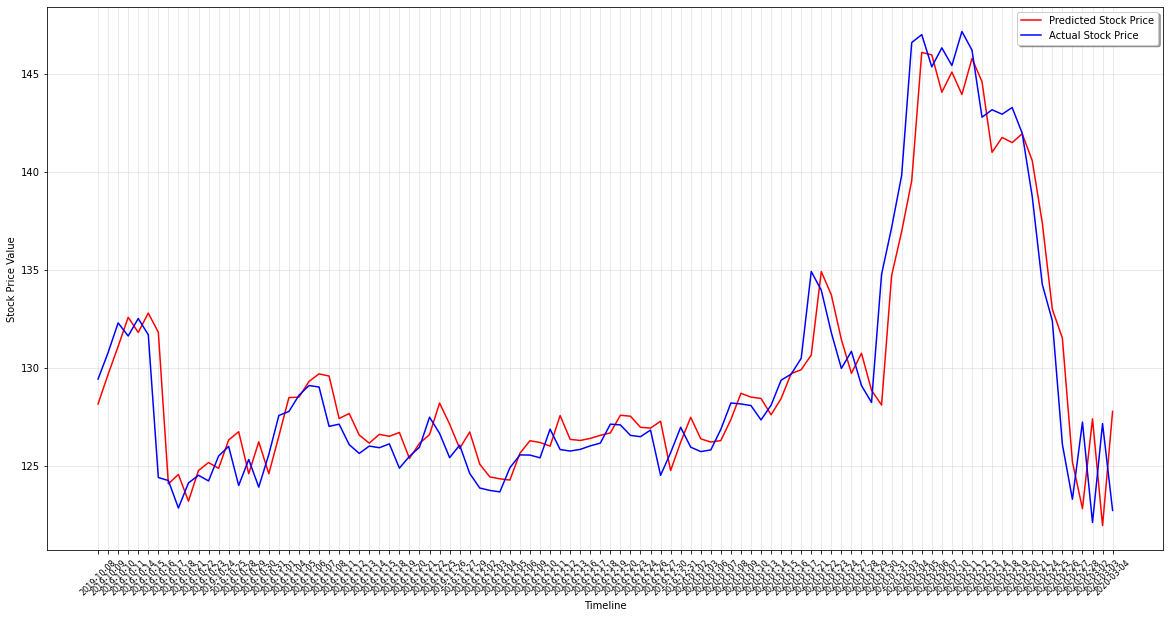

mae: 1.0766859199470953
rmse: 1.4818680843767627
mape: 0.03186295925960801


In [18]:
codeM.allStock(data, model, 8, isScaled=True)

## pca solo escalando x

In [9]:
data_scaler_PCA= pd.read_csv('dataPCA.csv', header=[0,1], index_col=0)
data_scaler_PCA.set_index(pd.DatetimeIndex(list(data_scaler_PCA.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_PCA

Attributes         A                                                  B  \
Symbol           BDX        GL       IBM        NSC       PEP       BDX   
1985-03-05 -2.607346 -2.744748 -3.220998  -2.503028 -3.340982 -0.095462   
1985-03-06 -2.581420 -2.808429 -3.233605  -2.466942 -3.348152  0.021050   
1985-03-07 -2.543426 -2.792236 -3.320441  -2.513221 -3.343990  0.150642   
1985-03-08 -2.577317 -2.909088 -3.319276  -2.407511 -3.367740  0.041437   
1985-03-11 -2.601373 -2.725493 -3.227721  -2.512020 -3.386844 -0.039727   
...              ...       ...       ...        ...       ...       ...   
2020-12-22  8.633196  8.215010  3.636603  11.634582  8.949916 -2.239740   
2020-12-23  8.551392  8.184525  3.699907  11.668303  8.934178 -2.218183   
2020-12-24  8.483667  8.162911  3.734764  11.604364  8.875919 -2.673588   
2020-12-28  8.424258  8.153634  3.698655  11.677882  9.001638 -2.663747   
2020-12-29  8.417545  8.097457  3.669454  11.596079  9.082074 -2.687793   

Attributes                                                 C            \
Symbol            GL       IBM       NSC       PEP       BDX        GL   
1985-03-05 -0.104330 -0.068446 -0.160492 -0.049835  0.770484 -1.540526   
1985-03-06 -0.075275  0.064143 -0.100862 -0.091382  1.096881 -1.818180   
1985-03-07 -0.127229  0.148074 -0.288016 -0.063431  0.397070 -2.029712   
1985-03-08 -0.120372  0.118314  0.154614 -0.210034  0.869214 -2.877129   
1985-03-11  0.021261 -0.200119 -0.183881 -0.329133  0.941342 -0.951890   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -1.425100 -2.007629  0.696090 -2.411375  1.697642  0.395897   
2020-12-23 -1.372058 -1.879697  0.722763 -2.284390  2.121061 -1.223269   
2020-12-24 -1.233787 -1.775138  0.682003 -2.365089 -2.730829 -0.425018   
2020-12-28 -1.127726 -1.632272  0.545662 -2.303874  0.329748 -0.705930   
2020-12-29 -0.737660 -1.309197  0.913212 -2.238881  0.403500  0.934156   

Attributes                                 CloseNext                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.377351 -0.225016  0.883988    1.642262   3.088737   13.873695   
1985-03-06 -1.173861  0.462969 -1.114647    1.637751   3.033250   13.586567   
1985-03-07 -1.024686  1.304481  0.104625    1.619704   3.005508   13.534367   
1985-03-08 -0.624775 -1.175168 -0.619128    1.588121   2.977763   13.730146   
1985-03-11  1.182514 -0.363542 -0.515465    1.606167   3.060992   13.769285   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.018910  0.415500 -2.156588  244.250000  92.720818  122.266174   
2020-12-23 -0.109658  1.862171  0.142444  247.990005  92.690872  123.045761   
2020-12-24 -0.268454  1.106873  0.822187  248.149994  93.110062  123.174042   
2020-12-28 -0.364106  1.461245  2.490734  248.350006  91.982246  122.167496   
2020-12-29 -1.733772 -2.332660  0.164242  246.679993  93.030212  122.700371   

Attributes                                 D                                \
Symbol             NSC         PEP       BDX        GL       IBM       NSC   
1985-03-05    2.759651    1.147157 -0.739363  0.915692 -1.098949 -0.166401   
1985-03-06    2.822849    1.144183 -0.354145  1.309586 -1.158762  0.306748   
1985-03-07    2.775449    1.141212  0.463095  1.529128 -0.534397 -0.389850   
1985-03-08    2.764918    1.144183 -0.214694  2.060377 -0.544549  1.169372   
1985-03-11    2.764918    1.159043 -0.626982  0.724351 -0.916661 -0.303095   
...                ...         ...       ...       ...       ...       ...   
2020-12-22  232.182770  144.410004 -0.238490  0.995087 -0.181399 -1.676750   
2020-12-23  233.447678  145.059998 -0.430746 -1.454770 -0.573556 -1.449573   
2020-12-24  235.758347  146.910004 -0.635011  0.491356 -0.858887 -2.026808   
2020-12-28  233.049286  147.419998 -0.613183 -0.298445 -0.438297 -1.746892   
2020-12-29  235.031281  147.309998 -0.400044  1.878081 -0.549057 -1.596162   

Attributes        

In [8]:
dataNSC_scaler = data_scaler_PCA.xs('NSC', level=1, axis=1)

parameter_space ={"hidden_layer_sizes": [(100, 100),(50)],
    "activation": ['identity'],
    "solver": ['sgd', 'adam']
}
    
model = MLPRegressor(max_iter=50000)
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'activation': 'identity', 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}
0.4506232433915205


In [10]:
Params = {
    "hidden_layer_sizes": (100),
    "activation": 'identity',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])

'NSC'

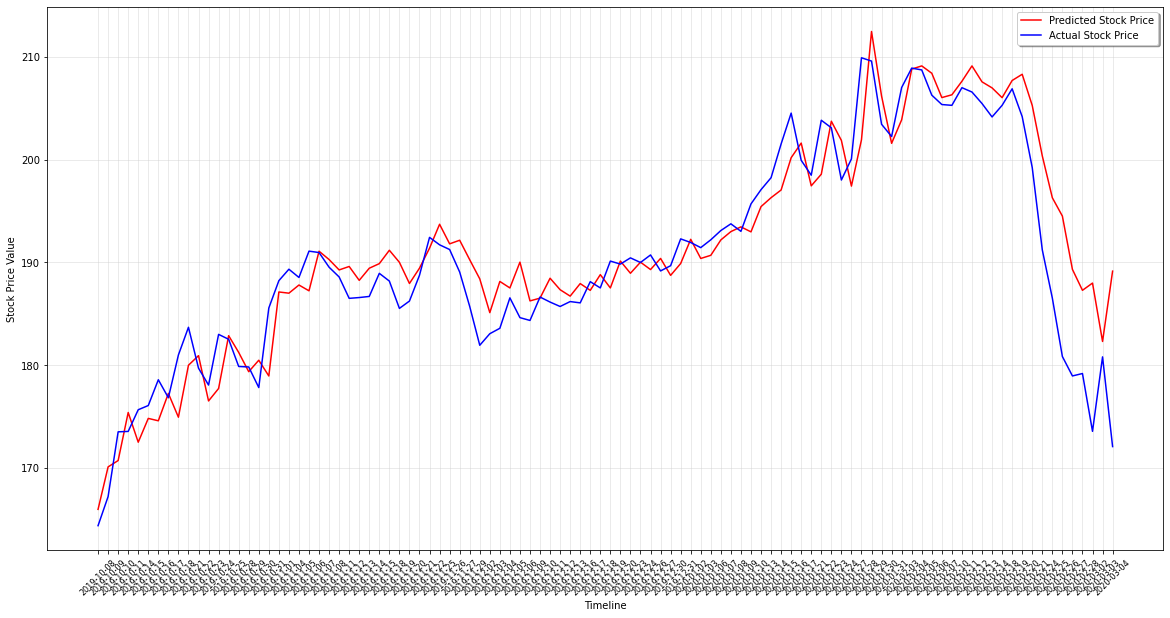

mae: 0.7752738602032181
rmse: 1.750811778648008
mape: 0.019861694026697675


'GL'

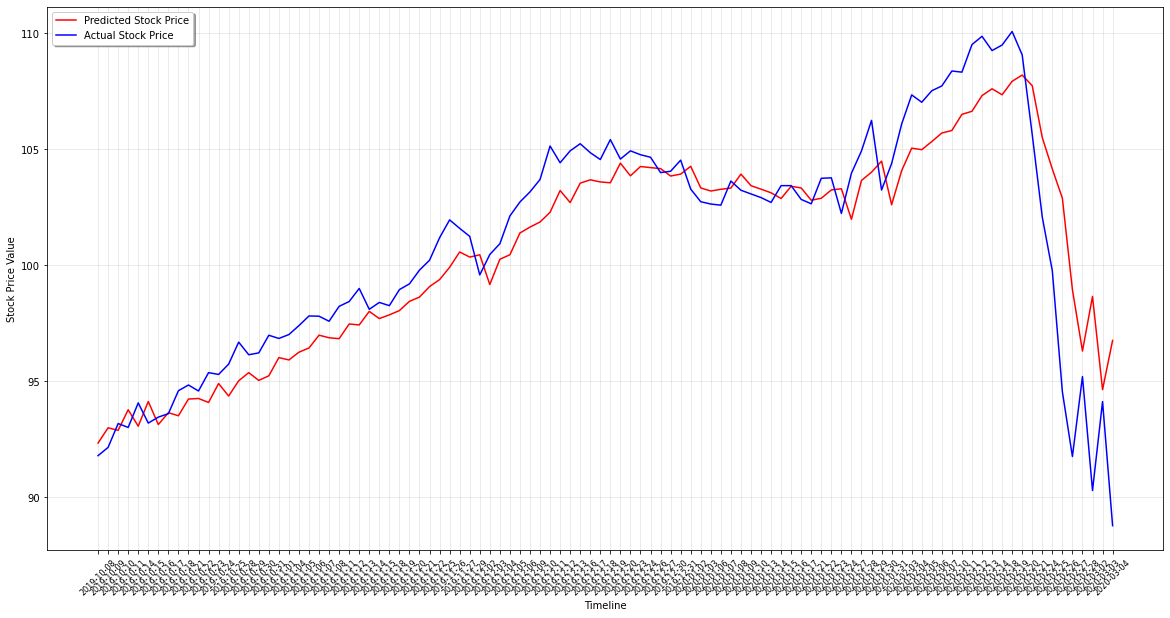

mae: 0.38176207553922925
rmse: 0.8579558484579574
mape: 0.021186026740614775


'PEP'

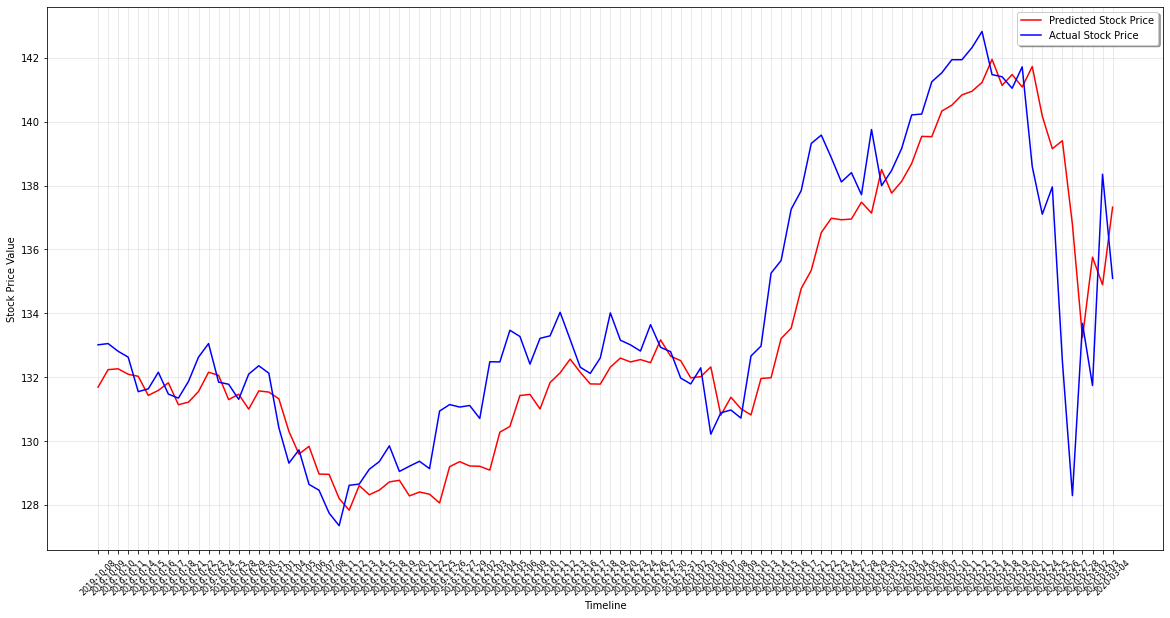

mae: 0.5123811286787832
rmse: 0.8839503479923667
mape: 0.02516898430184686


'BDX'

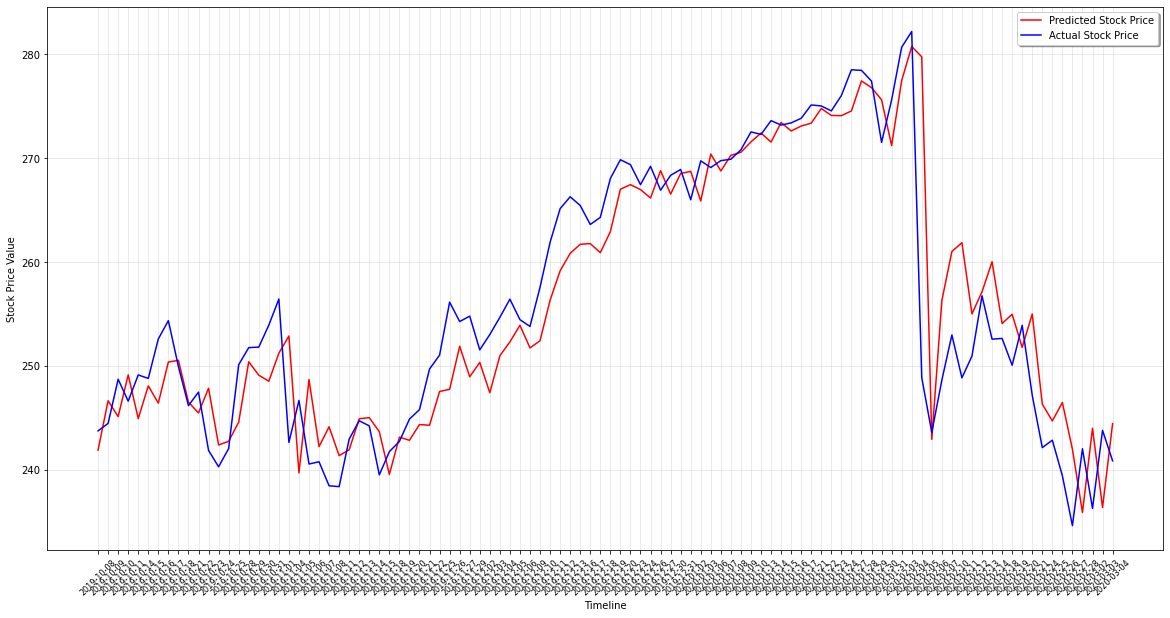

mae: 0.8911645119150037
rmse: 1.8927347808494486
mape: 0.021958335895284106


'IBM'

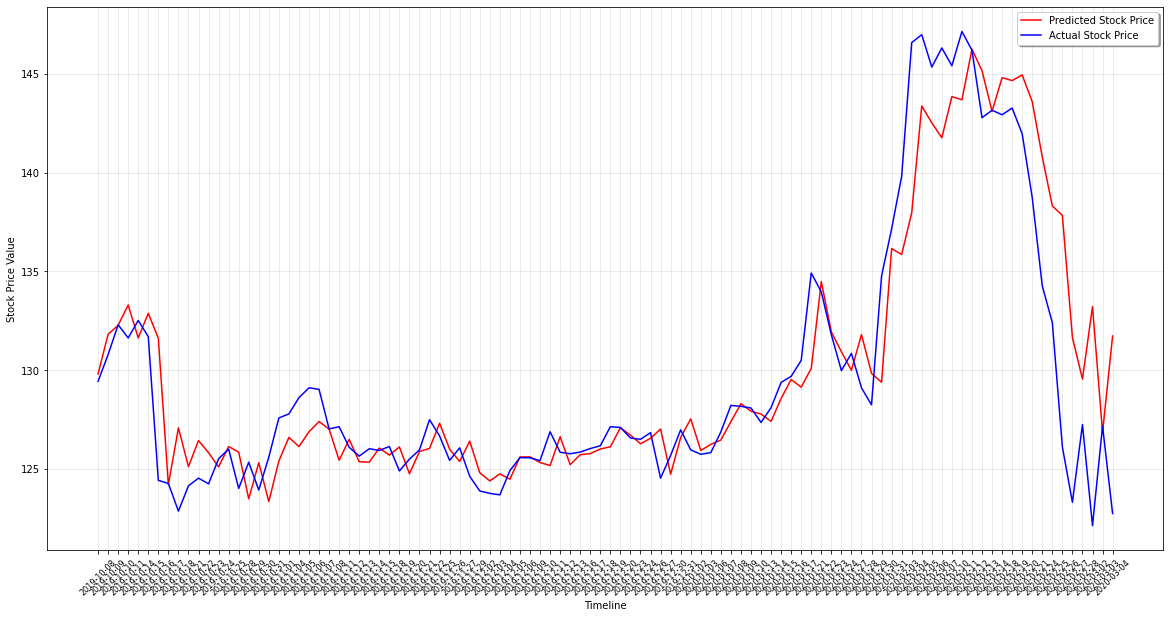

mae: 1.0283179695932116
rmse: 1.685819866153885
mape: 0.017394213817081807


In [11]:
codeM.allStock(data_scaler_PCA, model, 6)

## PCA all scaled

In [12]:
Params = {
    "hidden_layer_sizes": (100,100),
    "activation": 'identity',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])

'NSC'

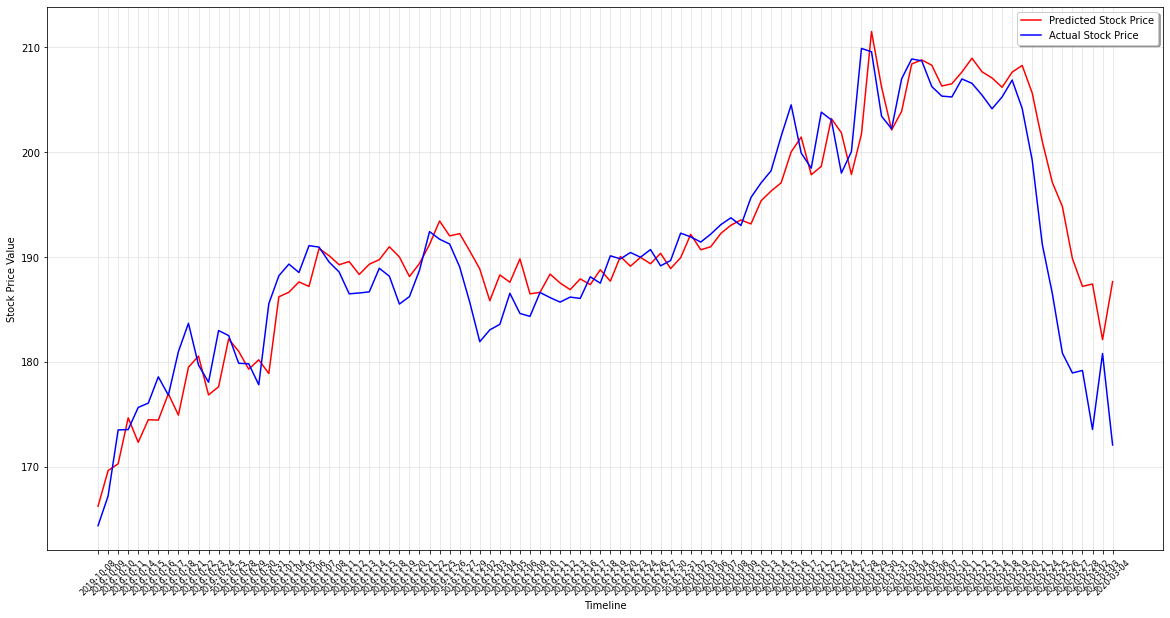

mae: 0.766659025499328
rmse: 1.724921537982901
mape: 0.01961240017799568


'GL'

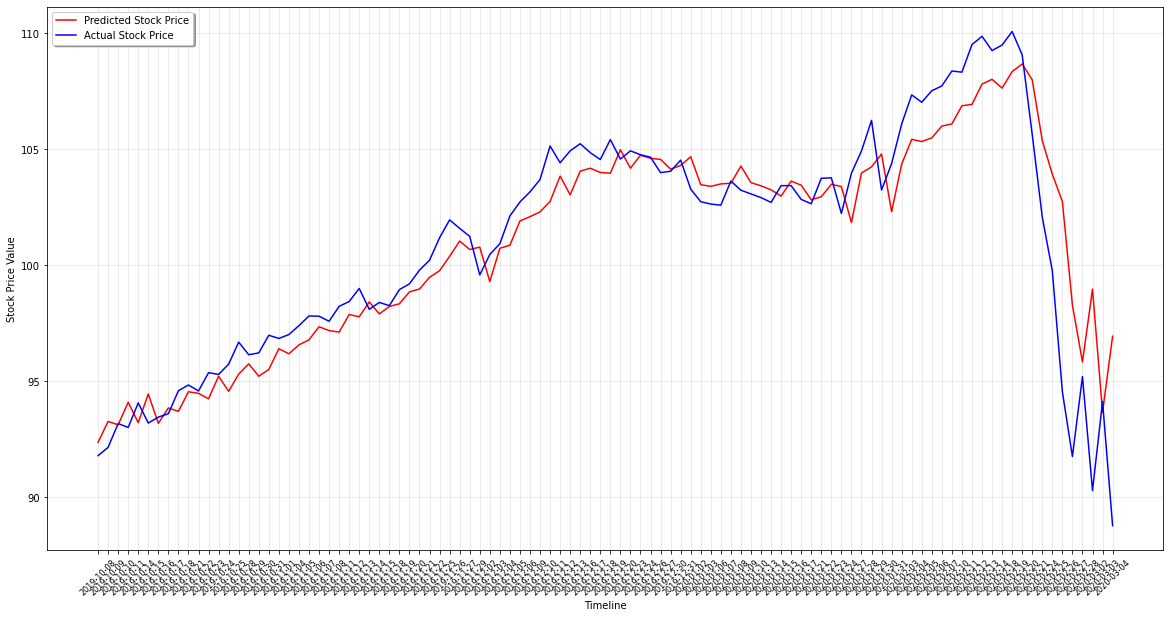

mae: 0.3635458827645672
rmse: 0.8262541962613441
mape: 0.02002832142894415


'PEP'

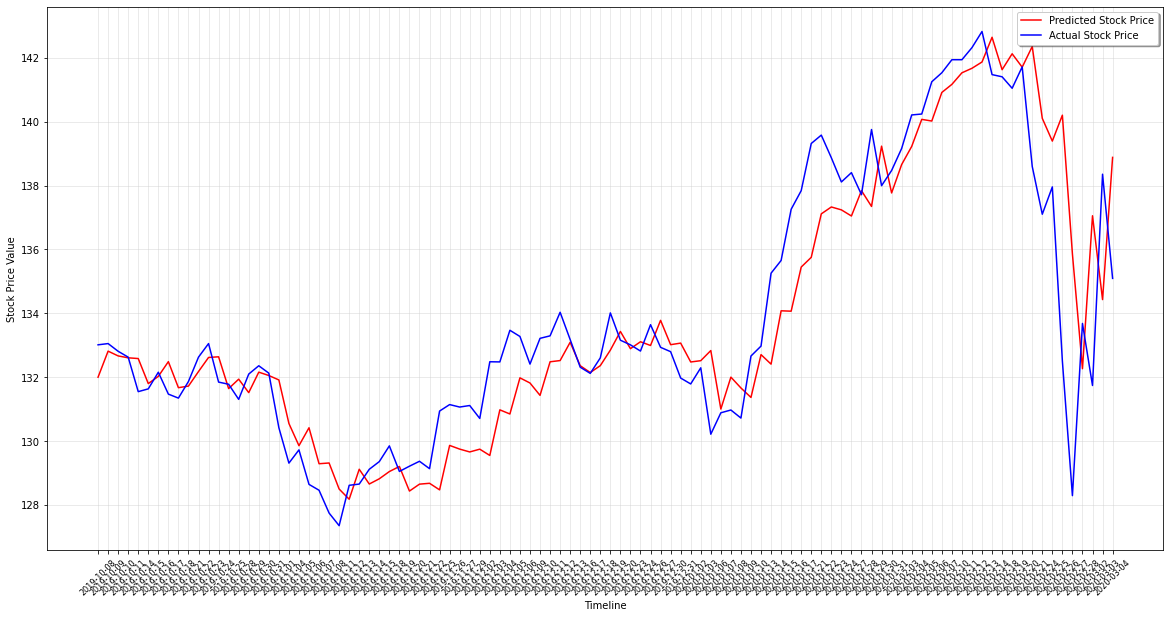

mae: 0.46903335037000965
rmse: 0.8686856854669508
mape: 0.01822943396552657


'BDX'

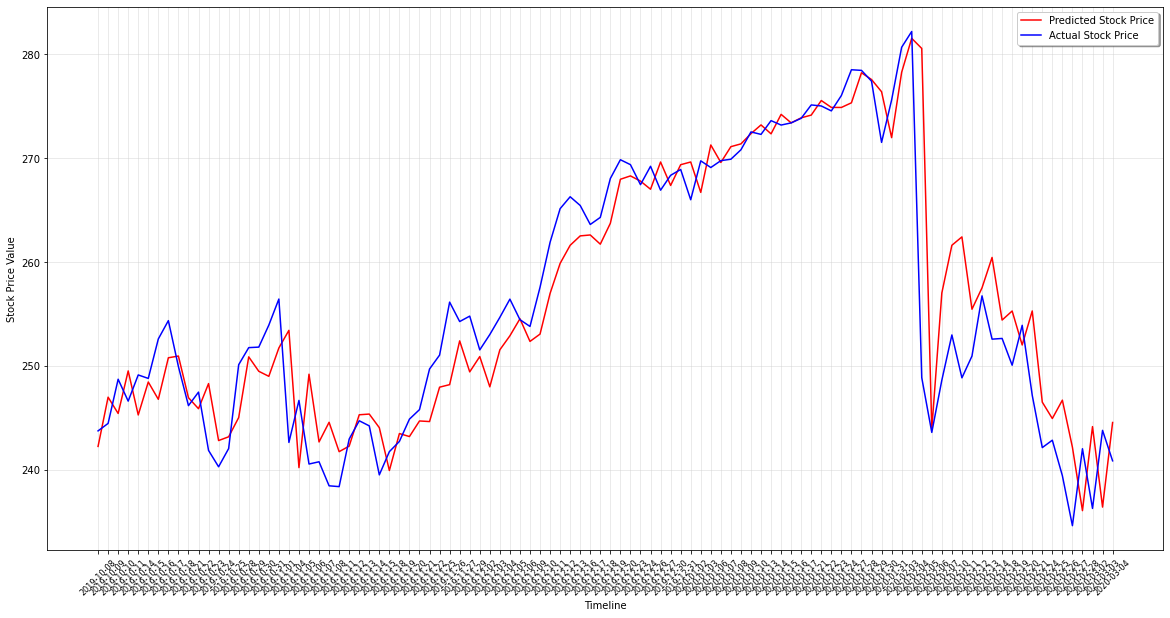

mae: 0.85414417679716
rmse: 1.8698672001006809
mape: 0.01885963617189948


'IBM'

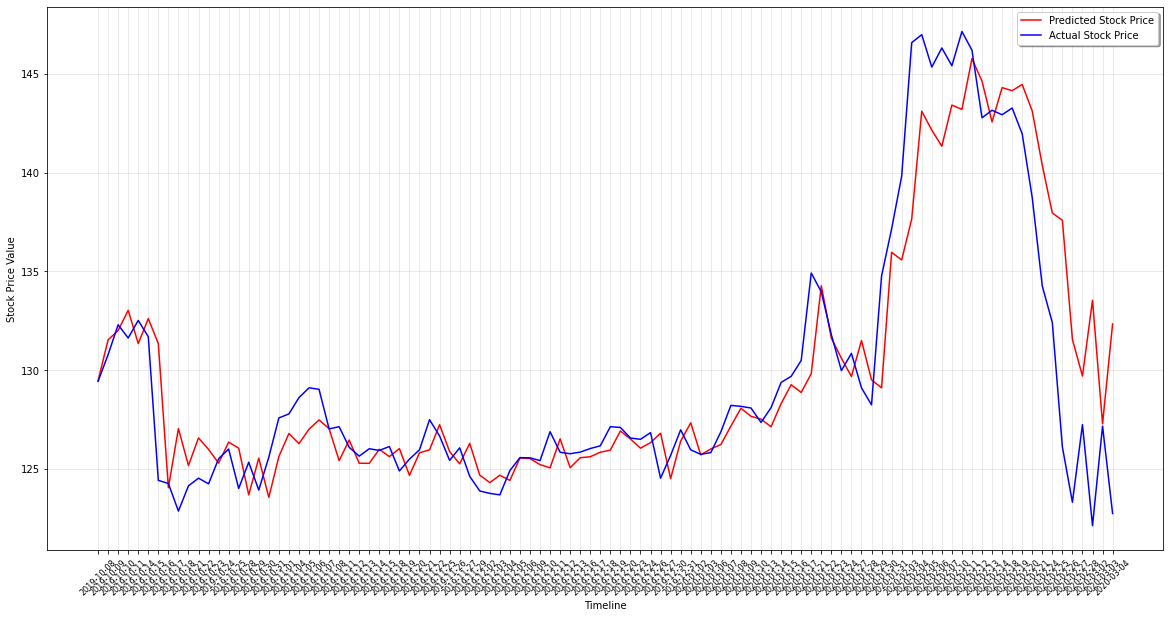

mae: 1.014035149009007
rmse: 1.6617365695865625
mape: 0.01748875975479042


In [13]:
codeM.allStock(data_scaler_PCA, model, 6, isScaled=True)

## window

In [21]:
data_scaler_window = pd.read_csv('datawindow.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_window

Attributes           0                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-14    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-15    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-18    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-19    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-20    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  242.690002  93.519264  122.631294  234.304214  144.970001   
2020-12-23  240.000000  91.592987  121.901054  228.328339  144.229996   
2020-12-24  244.130005  93.529251  124.269409  228.876129  144.770004   
2020-12-28  245.289993  93.349594  123.894424  227.780548  144.889999   
2020-12-29  248.699997  93.249794  123.894424  229.762558  145.710007   

Attributes          1                                                    2  \
Symbol            BDX        GL        IBM        NSC        PEP       BDX   
1985-03-14   576000.0  378000.0  4040000.0  1125900.0  5153400.0 -0.624992   
1985-03-15   923200.0  450225.0  4120000.0  1773900.0  3722400.0 -0.857135   
1985-03-18  1408000.0   71550.0  7028000.0   770400.0  4624200.0 -0.249985   
1985-03-19   987200.0   69525.0  6892000.0  3031200.0  2764800.0 -0.666667   
1985-03-20   692800.0  648675.0  4204000.0   936900.0  1609200.0 -0.750000   
...               ...       ...        ...        ...        ...       ...   
2020-12-22  1274000.0  332200.0  4481400.0  1161200.0  2975500.0  0.498271   
2020-12-23  1236600.0  426600.0  5050000.0  2004900.0  3952400.0 -0.504374   
2020-12-24  1261700.0  411600.0  4359600.0  1210400.0  3183800.0  0.641740   
2020-12-28  1210700.0  315600.0  4530100.0  1081800.0  4915800.0  0.070539   
2020-12-29  1172500.0  337900.0  3788000.0  1097100.0  3312500.0  0.621545   

Attributes                                                    3             \
Symbol             GL       IBM       NSC       PEP         BDX         GL   
1985-03-14  42.000023 -0.300000 -0.142862  0.700006    1.720674   3.251535   
1985-03-15  55.666877 -0.818182  0.363643 -0.749982    1.719894   3.249915   
1985-03-18  54.666638 -0.666667  1.000000  0.142847    1.719077   3.247759   
1985-03-19  81.250315 -0.466667 -0.875001 -0.400007    1.718088   3.245349   
1985-03-20  32.200041  0.812500 -0.250000 -0.333371    1.716795   3.242686   
...               ...       ...       ...       ...         ...        ...   
2020-12-22  -0.041916  0.099997  0.122034  0.792896  242.387914  84.747340   
2020-12-23  -1.000000 -0.646210 -0.949631 -0.421490  242.364154  84.815455   
2020-12-24   0.488766  0.618475 -0.299998  0.152178  242.381724  84.902160   
2020-12-28  -0.379745 -0.296873 -0.369729  0.579617  242.410662  84.986214   
2020-12-29  -0.129997 -0.449154  0.188745  0.450985  242.473243  85.068439   

Attributes                                             4                      \
Symbol             IBM         NSC         PEP       BDX        GL       IBM   
1985-03-14   14.185128    2.769713    1.143313 -0.007366 -0.025473 -0.012914   
1985-03-15   14.182029    2.769613    1.143351 -0.011991 -0.032744 -0.034875   
1985-03-18   14.176104    2.770142    1.143359 -0.015837 -0.042494 -0.074589   
1985-03-19   14.169718    2.770195    1.143338 -0.020109 -0.051861 -0.109018   
1985-03-20   14.165344    2.770143    1.143346 -0.025747 -0.060823 -0.119132   
...                ...         ...         ...       ...       ...       ...   
2020-12-22  119.129244  202.686896  135.104759  1.462677  1.799938  2.289730   
2020-12-23  119.156825  202.942035  135.195557  1.466273  1.456414  2.078649   
2020-12-24  119.207696  203.200086  135.290825  1.781840  1.325134  2.078513   
2020-12-28  119.254330  203.444668  135.386339  2.101308  1.192846  2.024806   
2020-12-29  119.300500  203.706537  135.489062  2.599680  1.

In [22]:
dataNSC_scaler = data_scaler_window.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,CloseNext
1985-03-14,2.738583,1125900.0,-0.142862,2.769713,-0.003494,-0.015801,-0.000900,0.045925,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,...,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.717519
1985-03-15,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,...,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.696452
1985-03-18,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,...,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.706985
1985-03-19,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,...,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.685919
1985-03-20,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,...,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.706985,1068300.0,0.000000,2.767720,-0.013418,0.010532,-0.005794,0.045925,2.664852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,234.304214,1161200.0,0.122034,202.686896,2.994379,-1.244980,4.445476,2.921728,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,...,229.762558,1097100.0,0.188745,203.706537,0.323638,1.982010,2.379929,4.650179,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,232.182770
2020-12-23,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,...,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,229.573318,806200.0,0.247494,204.485850,-0.342254,0.358551,1.149920,4.805877,233.447678
2020-12-24,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,1097100.0,0.18874

In [27]:
dataNSC_scaler = data_scaler_PCA.xs('NSC', level=1, axis=1)

parameter_space ={
    "hidden_layer_sizes": [(100, 100),(50)],
    "activation": ['identity'],
    "solver": ['sgd', 'adam']
}
    
model = MLPRegressor(max_iter=50000)
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


{'activation': 'identity', 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}
1.3641147967108185


C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [25]:
Params = {
    "hidden_layer_sizes": (50),
    "activation": 'identity',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=70000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])

'NSC'

C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


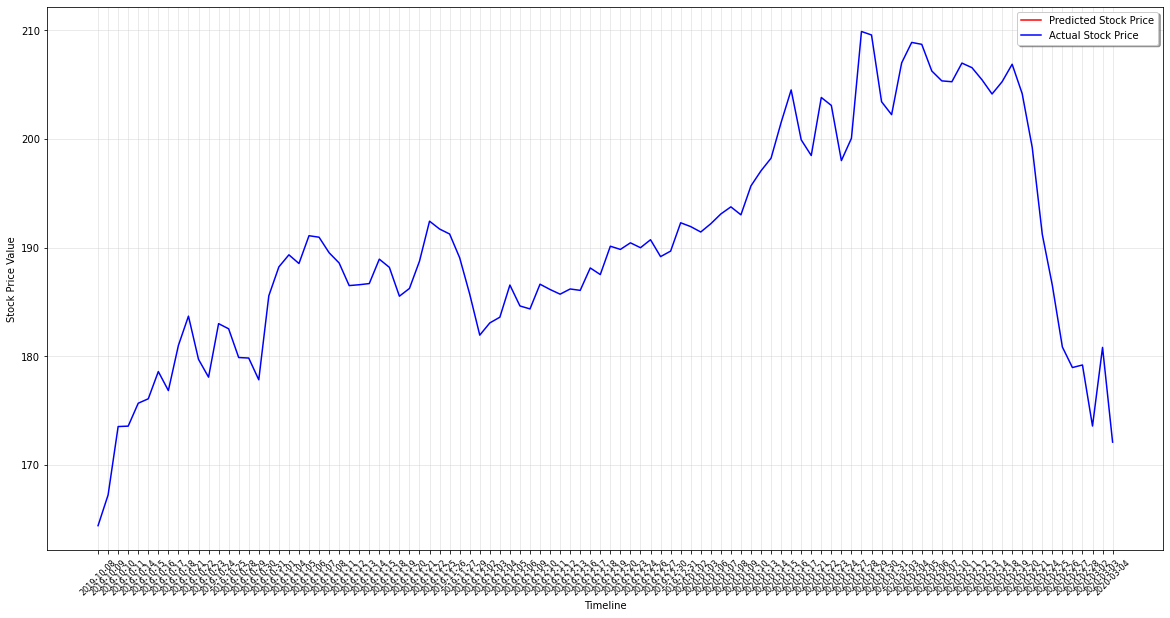

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
codeM.allStock(data_scaler_window, model,55)

## windows all scaled

In [27]:
Params = {
    "hidden_layer_sizes": (100,100,100),
    "activation": 'identity',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])

'NSC'

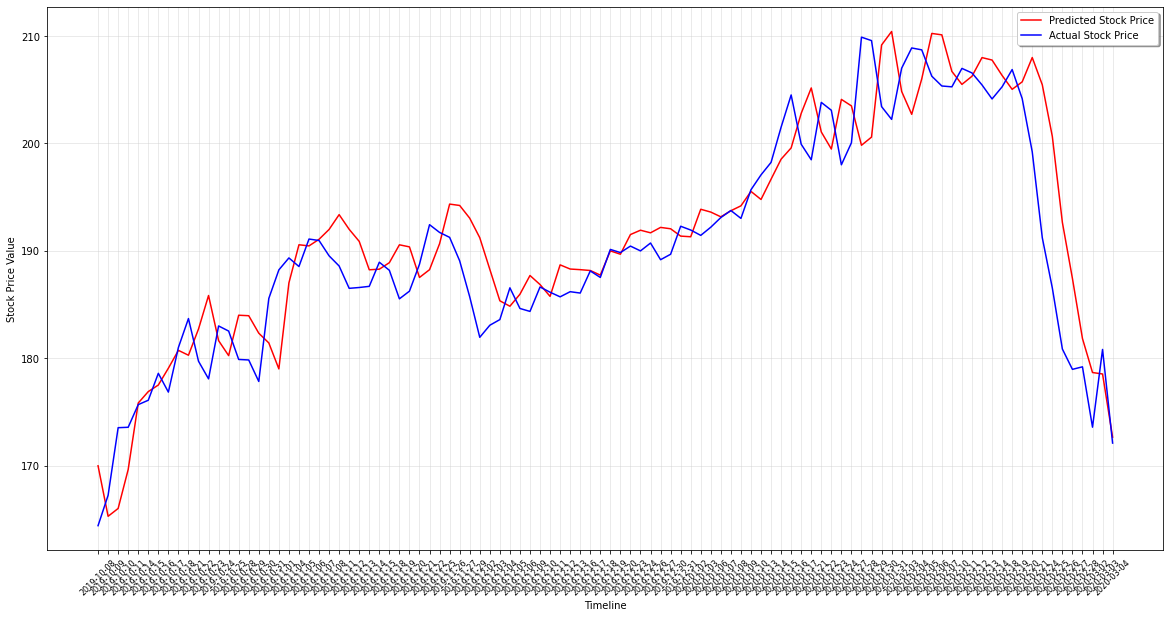

mae: 0.8357960734109817
rmse: 1.6332934117349491
mape: 0.026003716749645817


'GL'

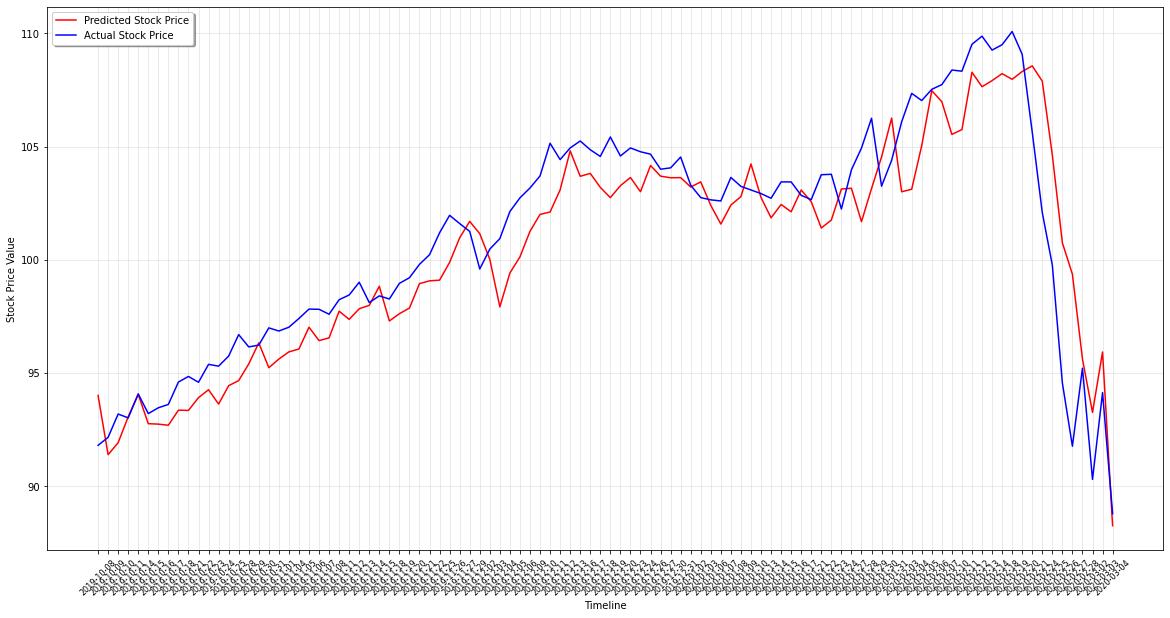

mae: 0.44616744212027193
rmse: 0.8741132362709051
mape: 0.023431917494477202


'PEP'

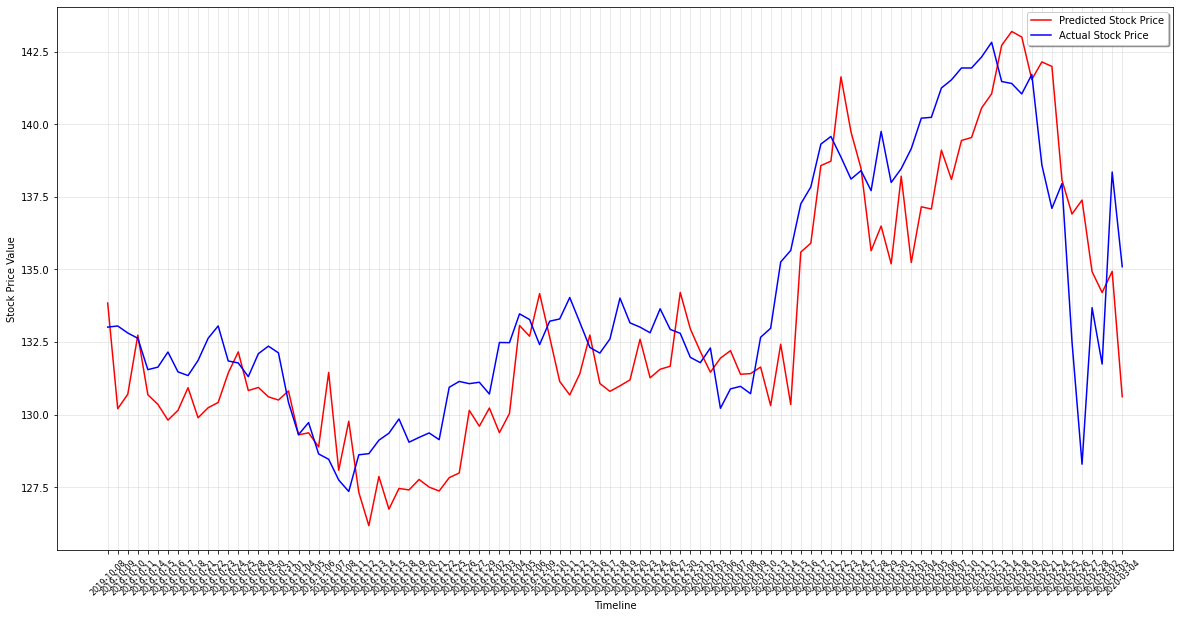

mae: 0.697443176630287
rmse: 1.1553049530099937
mape: 0.03100302513567056


'BDX'

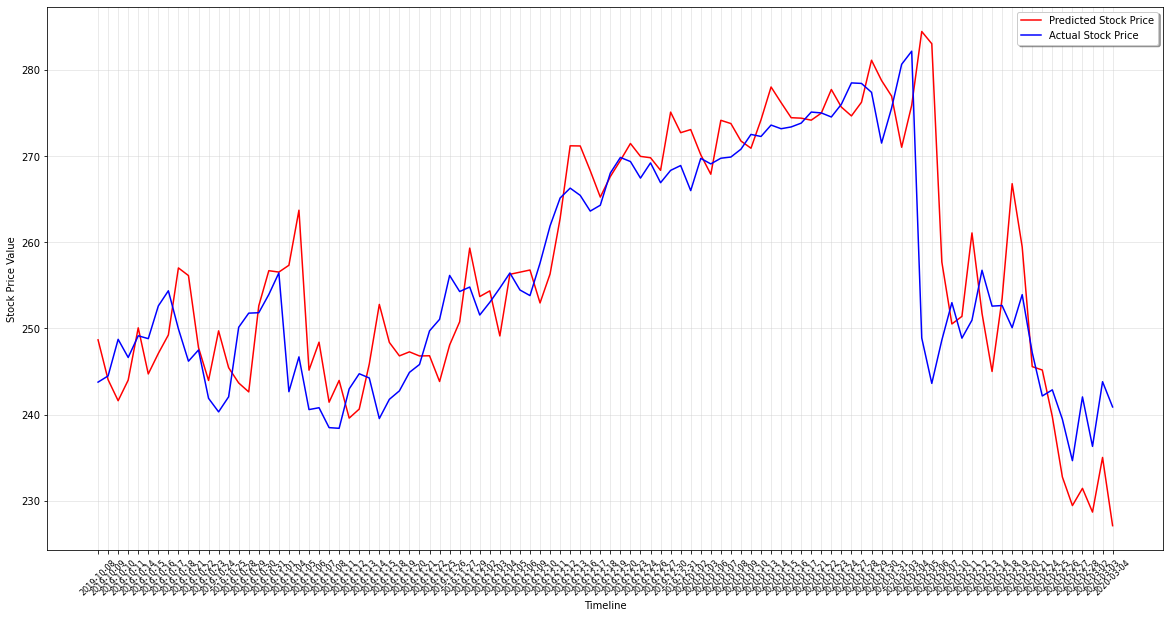

mae: 1.3393826602039802
rmse: 2.6356148164137188
mape: 0.04386330903263322


'IBM'

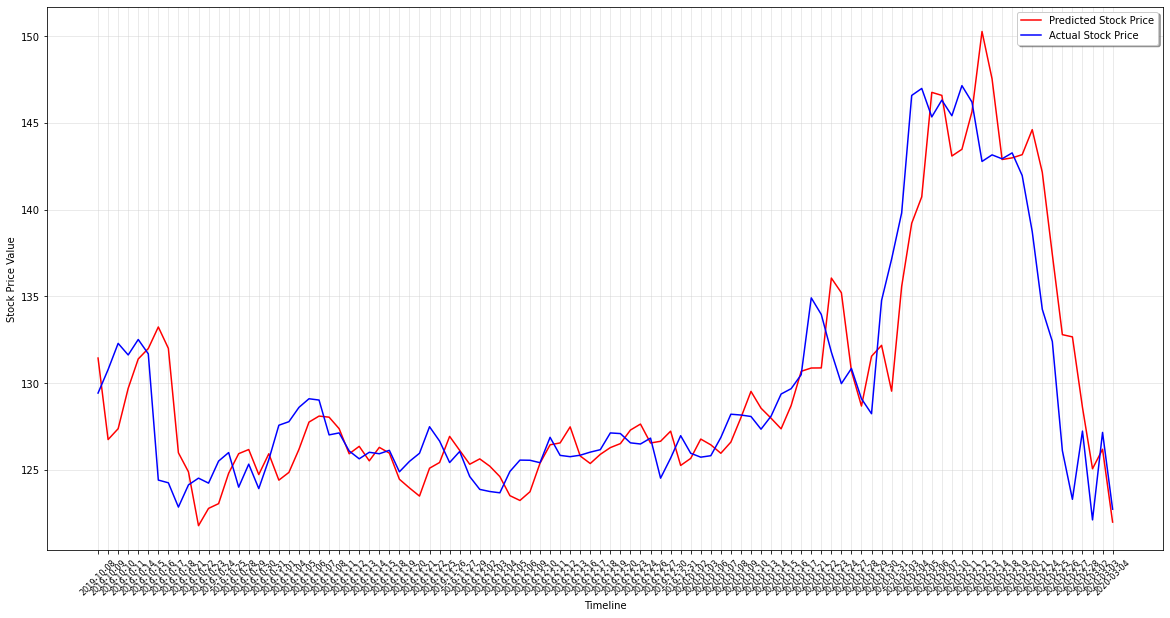

mae: 1.3869044329686233
rmse: 2.143486125747084
mape: 0.0259659208667096


In [28]:
codeM.allStock(data_scaler_window, model, 55, isScaled=True)

## window pca

In [14]:
data_scaler_window = pd.read_csv('datawindowPCA.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)

In [17]:
Params = {
    "hidden_layer_sizes": (50),
    "activation": 'identity',
    "solver": 'sgd'
}
model=MLPRegressor(max_iter=50000, hidden_layer_sizes=Params['hidden_layer_sizes'], activation=Params['activation'],solver=Params['solver'])

'NSC'

C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\joseu\anaconda3\envs\stonks\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


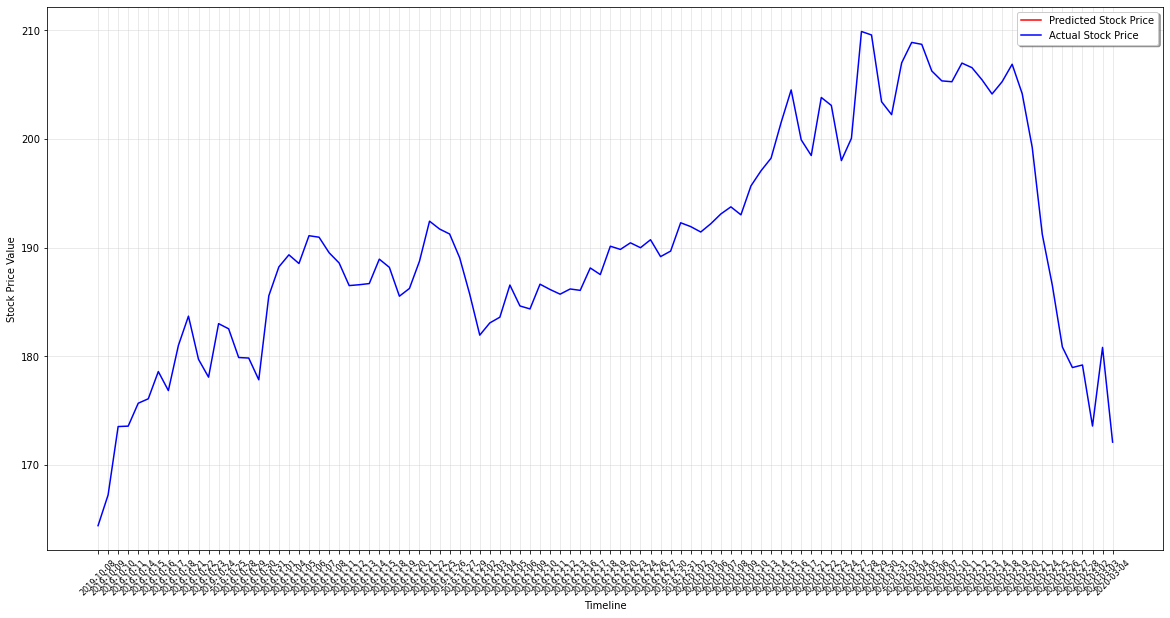

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
codeM.allStock(data_scaler_window, model, 41)

'NSC'

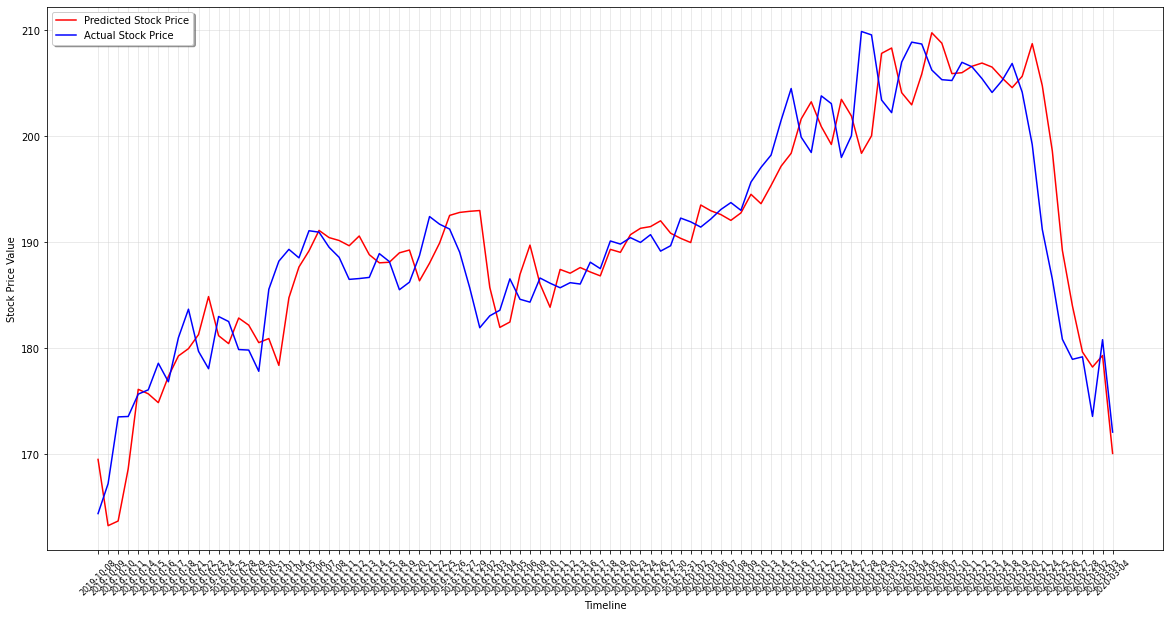

mae: 0.8492678913645751
rmse: 1.7085665693700733
mape: 0.025182477496399115


'GL'

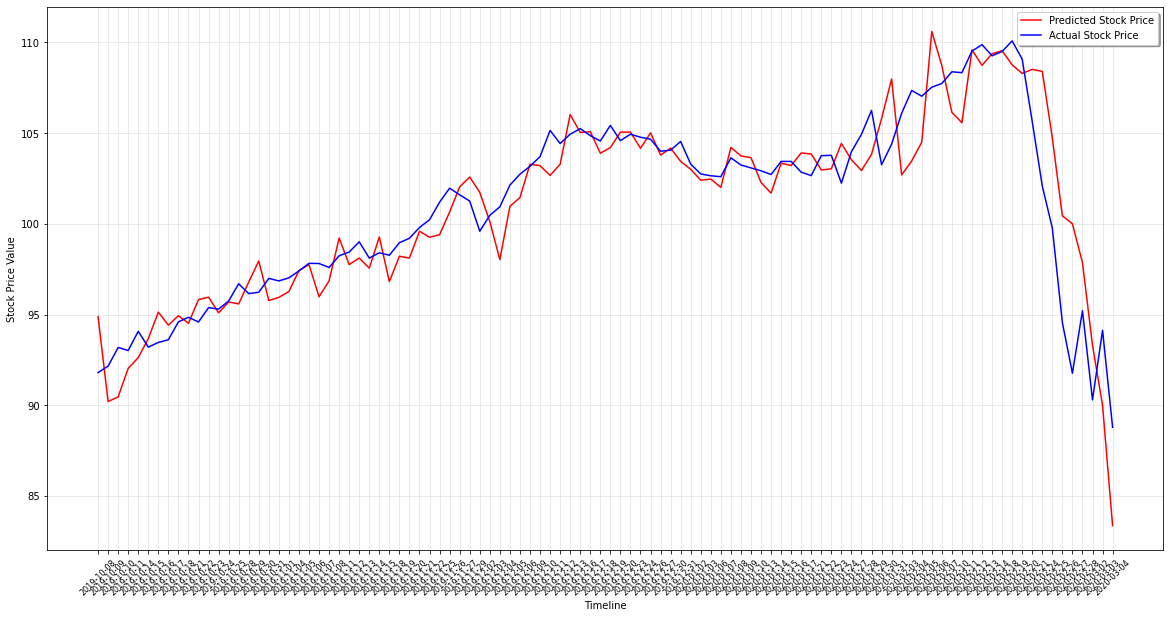

mae: 0.4935108724651611
rmse: 0.949484384300184
mape: 0.030916378540535736


'PEP'

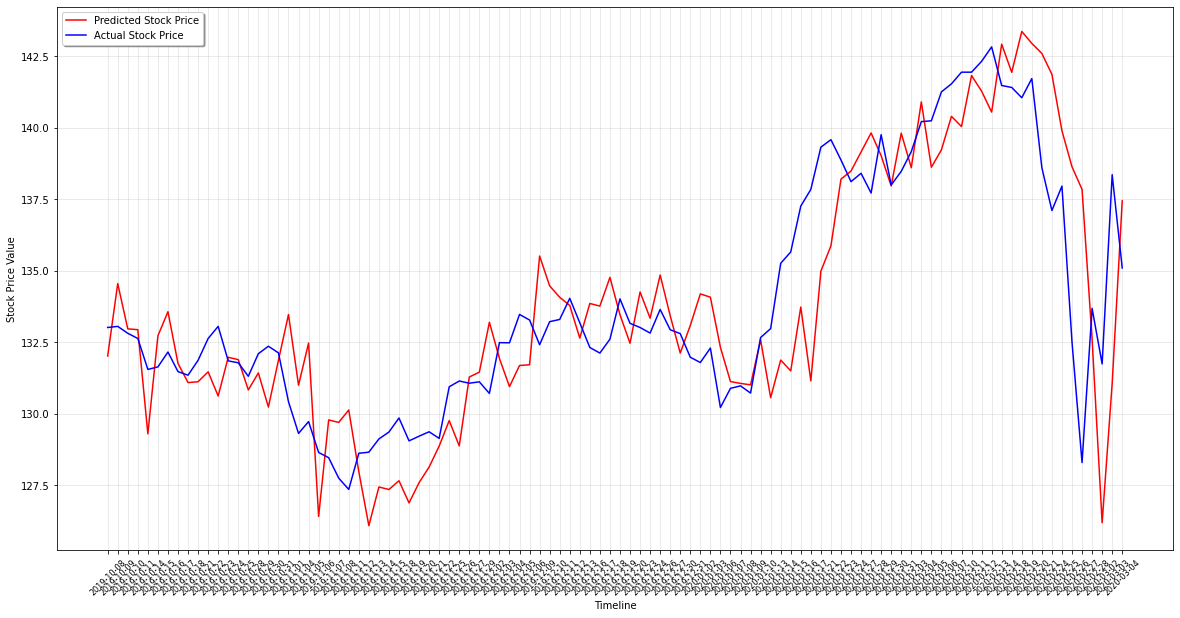

mae: 0.7031698407094058
rmse: 1.2915443016142456
mape: 0.029796212249615726


'BDX'

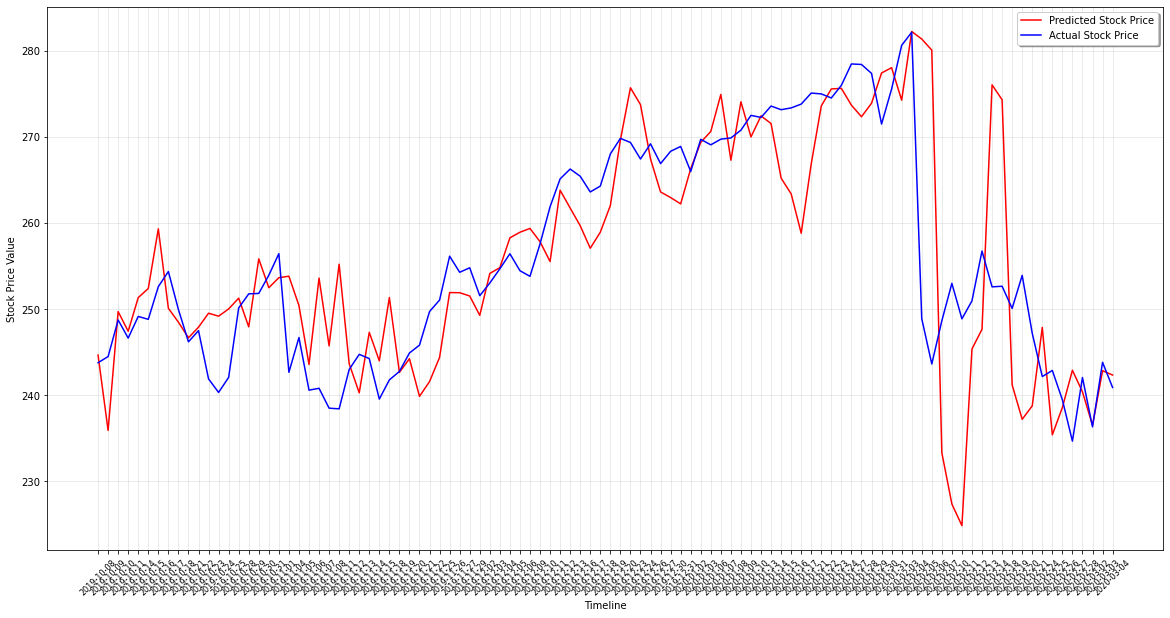

mae: 1.7089040607466734
rmse: 3.4892185958044637
mape: 0.05082060661191707


'IBM'

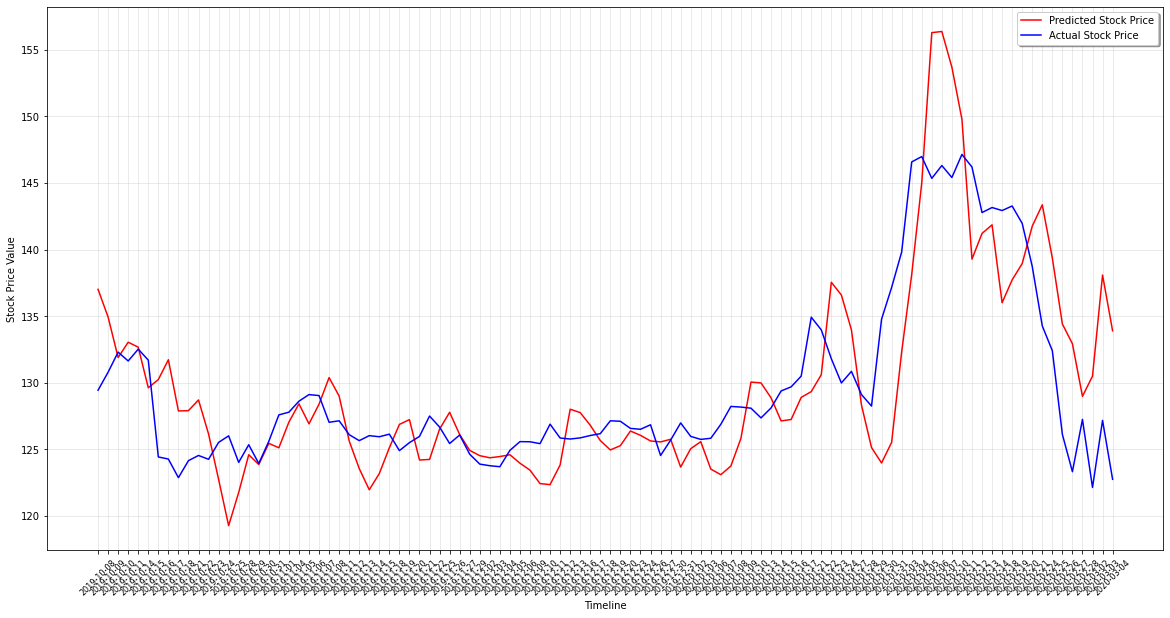

mae: 1.7126493487924193
rmse: 2.7159120139263018
mape: 0.03191679445300628


In [19]:
codeM.allStock(data_scaler_window, model, 41, isScaled=True)